<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 그림 및 예제 코드



In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

Cloning into 'noviceml'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 65 (delta 5), reused 13 (delta 2), pack-reused 48
Unpacking objects: 100% (65/65), done.


In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

## 그림 3-1

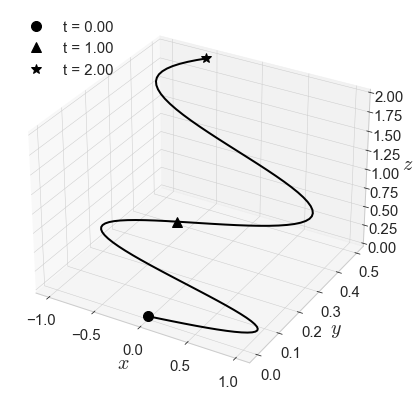

In [2]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$z$', fontsize=20)

t = np.linspace(0, 2, 101)
x = np.sin(6*t)
y = 1/4 * t
z = t**2 / 2

ax.plot3D(x, y, z, c='k')
ax.plot([x[0]],  [y[0]],  [z[0]],  'o', markersize=10, color='k',
        label="t = {:.2f}".format(t[0]))
ax.plot([x[50]], [y[50]], [z[50]], '^', markersize=10, color='k',
        label="t = {:.2f}".format(t[50]))
ax.plot([x[-1]], [y[-1]], [z[-1]], '*', markersize=10, color='k',
        label="t = {:.2f}".format(t[-1])) 

ax.legend(fontsize=15, loc="upper left")

if file_print == True :
    fig.savefig("imgs/chap3/fig3-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-3

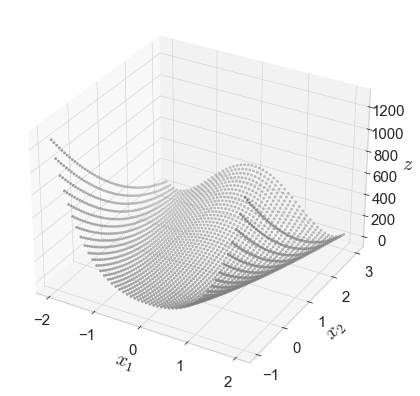

In [3]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-1, 3, 50)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax.scatter3D(X1, X2, Z, marker='.', color='gray')

if file_print == True :
    fig.savefig("imgs/chap3/fig3-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-3.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-4

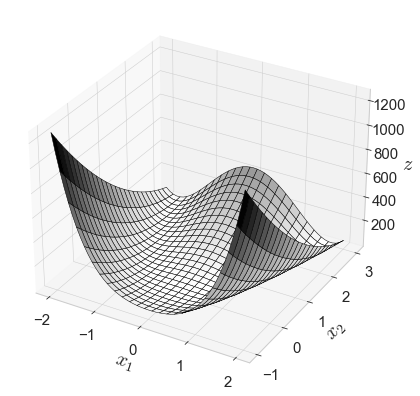

In [4]:
fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-4.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-5

### 그림 3-5에 사용할 등고선 생성

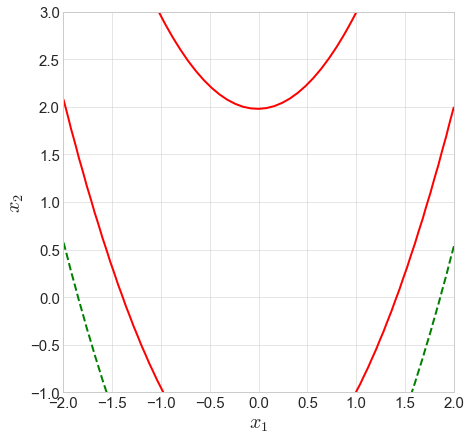

In [5]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

contours = ax.contour(X1, X2, Z, levels=[200, 600],  colors=['r','g','b'], 
            linestyles=['solid','dashed', 'dotted'])

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

plt.show()

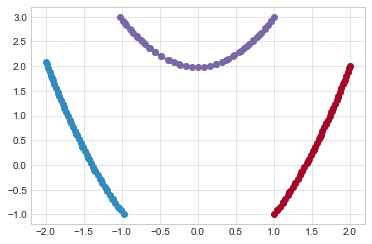

In [6]:
segs200=contours.collections[0].get_segments()

plt.plot(segs200[0][:,0], segs200[0][:,1], 'o-')
plt.plot(segs200[1][:,0], segs200[1][:,1], 'o-')
plt.plot(segs200[2][:,0], segs200[2][:,1], 'o-')

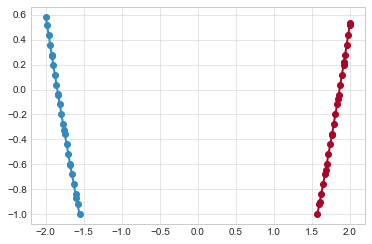

In [7]:
segs600=contours.collections[1].get_segments()

plt.plot(segs600[0][:,0], segs600[0][:,1], 'o-')
plt.plot(segs600[1][:,0], segs600[1][:,1], 'o-')


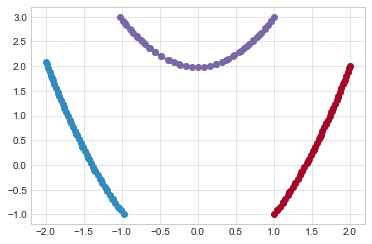

In [8]:
paths200=contours.collections[0].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths200[0].vertices[:,0], paths200[0].vertices[:,1], 'o-')
plt.plot(paths200[1].vertices[:,0], paths200[1].vertices[:,1], 'o-')
plt.plot(paths200[2].vertices[:,0], paths200[2].vertices[:,1], 'o-')
plt.show()

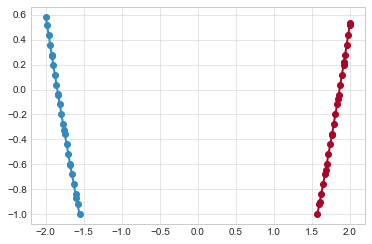

In [9]:
paths600=contours.collections[1].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths600[0].vertices[:,0], paths600[0].vertices[:,1], 'o-')
plt.plot(paths600[1].vertices[:,0], paths600[1].vertices[:,1], 'o-')

plt.show()

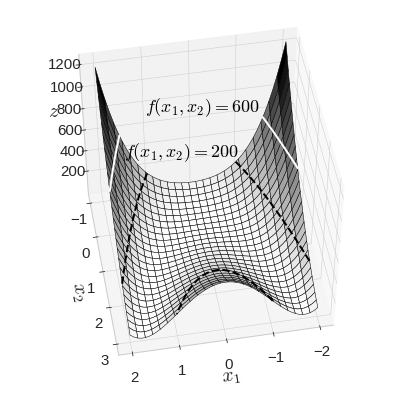

In [ ]:
fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")
#ax.plot_wireframe(X1, X2, Z, cmap=plt.cm.OrRd, edgecolor="k")

ax.plot3D(paths200[0].vertices[:,0], paths200[0].vertices[:,1], [200]*paths200[0].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[1].vertices[:,0], paths200[1].vertices[:,1], [200]*paths200[1].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[2].vertices[:,0], paths200[2].vertices[:,1], [200]*paths200[2].vertices.shape[0], 
          lw=2, color='k', linestyle='--')

ax.plot3D(paths600[0].vertices[:,0], paths600[0].vertices[:,1], [600]*paths600[0].vertices.shape[0], 
          lw=2, color='w', linestyle='-')
ax.plot3D(paths600[1].vertices[:,0], paths600[1].vertices[:,1], [600]*paths600[1].vertices.shape[0], 
          lw=2, color='w', linestyle='-')

ax.text(1.5, -1,  400, r"$f(x_1, x_2)=200$", color='k', fontsize=18)
ax.text(1., -1, 800, r"$f(x_1, x_2)=600$", color='k', fontsize=18)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

ax.view_init(50, 80)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-6

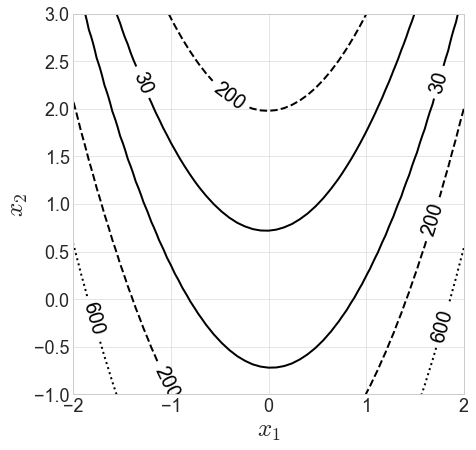

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

contours = ax.contour(X1, X2, Z, levels=[30, 200, 600],  colors='k', 
            linestyles=['solid','dashed', 'dotted'])

ax.clabel(contours, contours.levels, fmt="%d", inline=True, fontsize=20)

ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-6.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-7

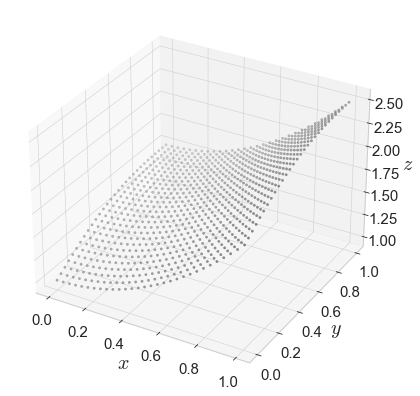

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

u = np.linspace(0,1,30)
v = np.linspace(0,1,30)
U, V = np.meshgrid(u, v)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))

ax.scatter3D(X, Y, Z, marker='.', color='gray')
# ax.plot_surface(X, Y, Z, color='gray')


if file_print == True :
    fig.savefig("imgs/chap3/fig3-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 3-13

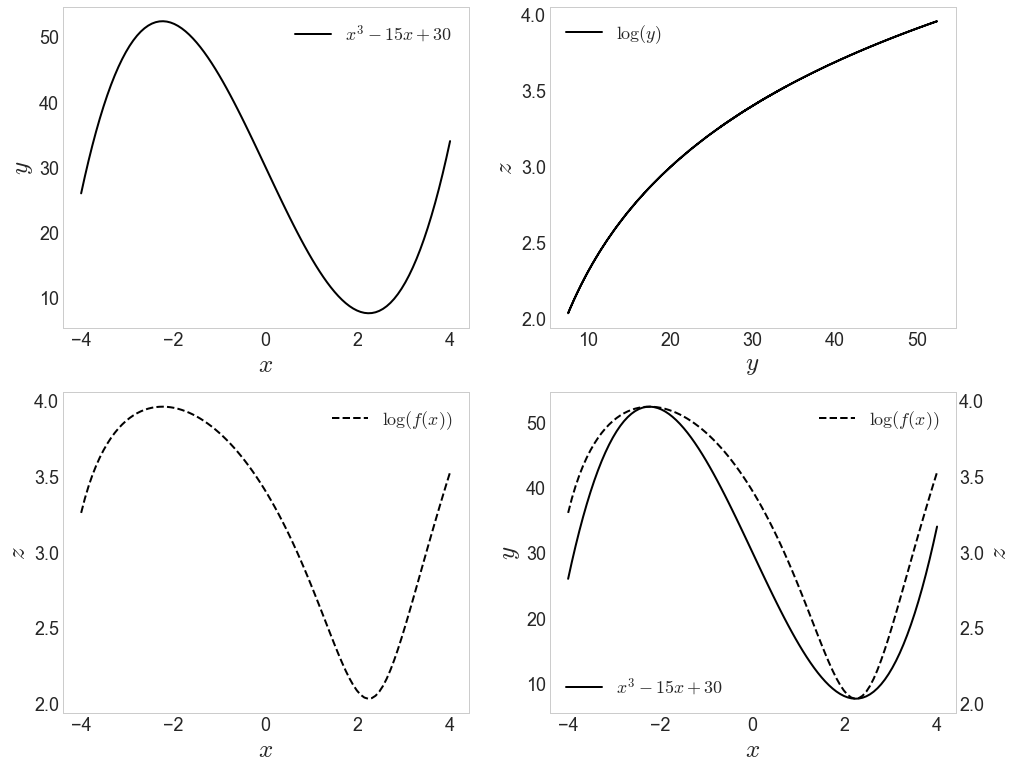

In [12]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((16,13))

plt.subplots_adjust(wspace=0.2, hspace=0.2)
x = np.linspace(-4, 4, 100)
y = x**3 - 15*x + 30
z = np.log(y)

ax[0,0].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel('$x$', fontsize=25)
ax[0,0].set_ylabel('$y$', fontsize=25)
ax[0,0].legend(fontsize=18)
ax[0,0].grid(False)

ax[0,1].plot(y,z, label=r'$\log(y)$', color='k')
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel('$y$', fontsize=25)
ax[0,1].set_ylabel('$z$', fontsize=25)
ax[0,1].legend(fontsize=18)
ax[0,1].grid(False)

ax[1,0].plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax[1,0].xaxis.set_tick_params(labelsize=18)
ax[1,0].yaxis.set_tick_params(labelsize=18)
ax[1,0].set_xlabel('$x$', fontsize=25)
ax[1,0].set_ylabel('$z$', fontsize=25)
ax[1,0].legend(fontsize=18)
ax[1,0].grid(False)

ax[1,1].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[1,1].xaxis.set_tick_params(labelsize=18)
ax[1,1].yaxis.set_tick_params(labelsize=18)
ax[1,1].set_xlabel('$x$', fontsize=25)
ax[1,1].set_ylabel('$y$', fontsize=25)
ax[1,1].legend(loc='lower left', fontsize=18)
ax[1,1].grid(False)

ax_ = ax[1,1].twinx()
ax_.plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax_.yaxis.set_tick_params(labelsize=18)
ax_.set_ylabel('$z$', fontsize=25)
ax_.grid(False)
ax_.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-13.pdf", format='pdf', bbox_inches='tight')
    
plt.show()